# Nickolas4 Portfolio

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as dr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

In [2]:
#Generate portfolio
symbols = ['AAPL', 'MSFT', 'TLT', 'USO', 'GLD', 
           'SPY', 'MCD', 'KO', 'DOW', 'EMB']
asset_count = len(symbols)

In [3]:
#Empty DF to store web data
nickolas4 = pd.DataFrame()

In [4]:
risk_free = dr('^IRX', data_source='yahoo', 
                       start='2010-01-01')['Adj Close']/100
risk_free = risk_free.mean()
risk_free

0.005639821563019789

In [5]:
#Add 10 historic asset returns from Yahoo
for i in symbols:
    nickolas4[i] = dr(i, data_source='yahoo', 
    start='2010-01-01', end='2020-01-01')['Adj Close'].round(2)
nickolas4.columns = symbols

nickolas4.tail()

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB
Date,,,,,,,,,,
2019-12-26,289.22,158.67,136.94,12.89,142.38,322.94,197.06,55.02,55.22,114.02
2019-12-27,289.11,158.96,137.09,12.91,142.33,322.86,198.17,55.35,54.83,114.33
2019-12-30,290.83,157.59,136.59,12.89,142.63,321.08,196.91,55.27,54.34,114.14
2019-12-31,292.95,157.70,135.26,12.81,142.90,321.86,197.61,55.35,54.73,114.15
2020-01-02,299.64,160.62,136.78,12.81,143.95,324.87,200.79,54.99,53.75,114.29


#### Normalize data

/Users/nabrarpour4/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


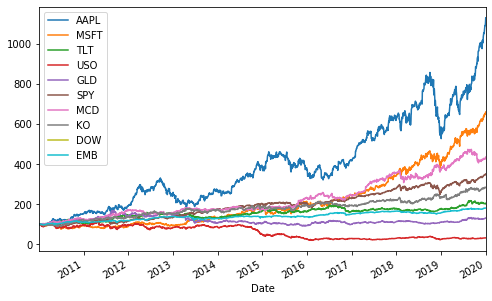

In [6]:
#Normalize Data - Method 1
(nickolas4 / nickolas4.ix[0] * 100).plot(figsize=(8,5))

/Users/nabrarpour4/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


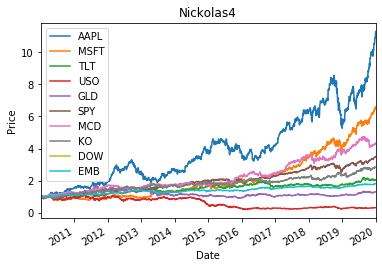

In [7]:
#Normalize Data - Method 2
def normalize_data(df):
    #normalized data
    norm_data = df/df.ix[0, :]
    
    #Plot Data
    ax = norm_data.plot(title='Nickolas4', fontsize = 10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()  #Must be called in order to show plots in some environments

normalize_data(nickolas4)

## Asset Returns

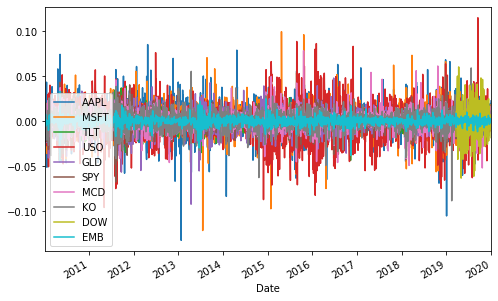

In [8]:
#DF of Logarithim Returns
n4_log = np.log(nickolas4/nickolas4.shift(1))
n4_log.plot(figsize=(8,5))

In [19]:
plot(n4_rolling12mrets)

NameError: name 'plot' is not defined

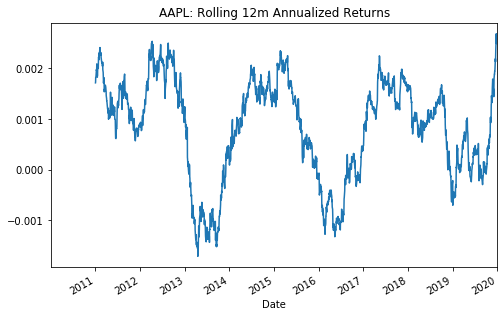

In [18]:
#DF of Rolling Annualized Returns
n4_rolling12mrets = n4_log.rolling(window=252).mean()
n4_rolling12mrets['AAPL'].plot(figsize=(8,5), title="AAPL: Rolling 12m Annualized Returns")

In [10]:
#DF of Avg. Annualized Performances 
n4_meanrets = np.log(nickolas4/nickolas4.shift(1)).mean() * 252
n4_meanrets

AAPL    0.268328
MSFT    0.107749
TLT     0.100524
USO    -0.136732
GLD     0.006786
SPY     0.139697
MCD     0.112294
KO      0.107743
DOW     0.120458
EMB     0.061254
dtype: float64

/Users/nabrarpour4/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


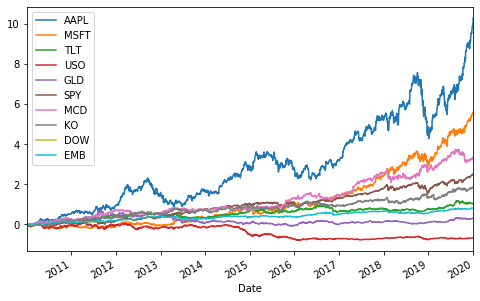

In [10]:
#Cumulative Returns
n4_cumrets = (nickolas4/nickolas4.ix[0]) - 1
n4_cumrets.plot(figsize=(8,5))

## Asset Volatility

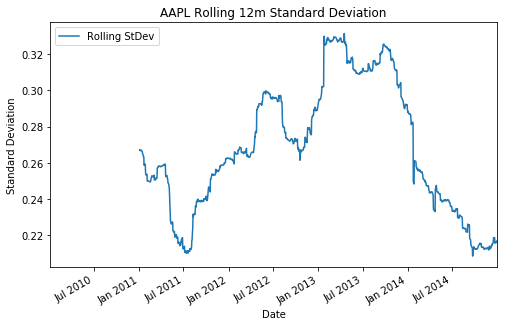

In [12]:
def rolling_stdev_asset(df,ticker):
    #Compute rolling stdev using a 252-day rolling window
    z = pd.rolling_std(df[ticker] * np.sqrt(252), window=252)
    
    #Define the axis
    ax = z.plot(figsize=(8,5), title = 'Portfolio Rolling Standard Deviation',\
                      label='Rolling StDev')
    
    #Add axis labels and legends
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Deviation')
    ax.legend(loc='upper left')
    plt.title(ticker + " Rolling 12m Standard Deviation")
    plt.show()
    
rolling_stdev_asset(n4_log, "AAPL")

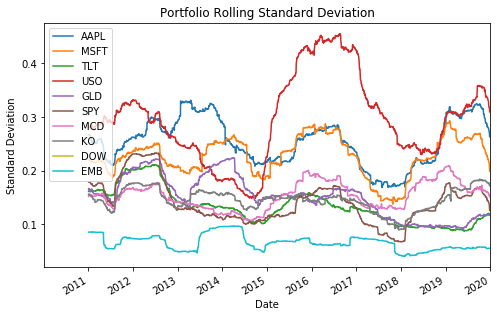

In [26]:
#Rolling Standard Deviation function - Method 1 
def rolling_stdev_multiasset():

    #Compute rolling stdev using a 252-day rolling window
    roll_stdev = n4_log.rolling(window=252).std() *np.sqrt(252)
    
    #Define the axis
    ax = roll_stdev.plot(figsize=(8,5), title = 'Portfolio Rolling Standard Deviation',\
                      label='Rolling StDev')
    
    #Add axis labels and legends
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Deviation')
    ax.legend(loc='upper left')
    plt.show()

rolling_stdev_multiasset()

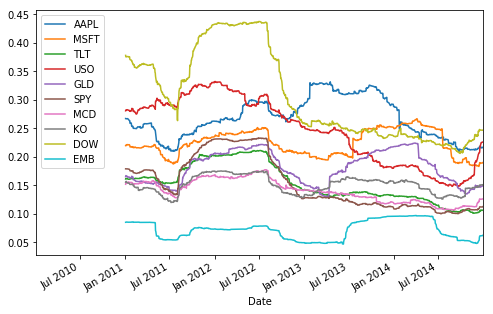

In [14]:
#DF of Rolling Annualized StDev - Method 2
n4_rolling_stdev = pd.rolling_std(n4_log, window=252) * np.sqrt(252)
n4_rolling_stdev.plot(figsize=(8,5))

## Variance-Covariance Matrix

In [20]:
# Variance-Covariance Matrix
n4_cov = n4_log.cov()
n4_cov

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB
AAPL,0.000264,0.000107,-0.000036,0.000073,1.660224e-06,0.000089,0.000047,3.924482e-05,0.000128,0.000016
MSFT,0.000107,0.000205,-0.000034,0.000069,-3.584175e-06,0.000092,0.000054,4.985927e-05,0.000085,0.000016
TLT,-0.000036,-0.000034,0.000075,-0.000048,1.783659e-05,-0.000039,-0.000018,-1.782238e-05,-0.000074,0.000002
USO,0.000073,0.000069,-0.000048,0.000372,2.842768e-05,0.000075,0.000033,3.480493e-05,0.000153,0.000022
GLD,0.000002,-0.000004,0.000018,0.000028,9.565472e-05,-0.000002,-0.000003,5.623346e-07,-0.000042,0.000008
SPY,0.000089,0.000092,-0.000039,0.000075,-1.529189e-06,0.000086,0.000048,4.854540e-05,0.000086,0.000015
MCD,0.000047,0.000054,-0.000018,0.000033,-2.926633e-06,0.000048,0.000097,3.964714e-05,-0.000005,0.000010
KO,0.000039,0.000050,-0.000018,0.000035,5.623346e-07,0.000049,0.000040,8.748232e-05,0.000030,0.000011
DOW,0.000128,0.000085,-0.000074,0.000153,-4.184026e-05,0.000086,-0.000005,3.008251e-05,0.000436,0.000009
EMB,0.000016,0.000016,0.000002,0.000022,8.067670e-06,0.000015,0.000010,1.106848e-05,0.000009,0.000018


## Correlation Matrix

In [21]:
# Correlation Matrix
n4_corr = n4_log.corr()
n4_corr

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB
AAPL,1.000000,0.458526,-0.256648,0.234026,0.010451,0.593754,0.294120,0.258323,0.404624,0.229128
MSFT,0.458526,1.000000,-0.277366,0.249663,-0.025613,0.694009,0.387566,0.372574,0.341422,0.260503
TLT,-0.256648,-0.277366,1.000000,-0.286986,0.210521,-0.482719,-0.212488,-0.219959,-0.445565,0.049859
USO,0.234026,0.249663,-0.286986,1.000000,0.150622,0.421405,0.174452,0.192832,0.364018,0.260785
GLD,0.010451,-0.025613,0.210521,0.150622,1.000000,-0.016869,-0.030452,0.006147,-0.262659,0.192925
SPY,0.593754,0.694009,-0.482719,0.421405,-0.016869,1.000000,0.528738,0.559963,0.530686,0.380660
MCD,0.294120,0.387566,-0.212488,0.174452,-0.030452,0.528738,1.000000,0.431377,-0.024411,0.227609
KO,0.258323,0.372574,-0.219959,0.192832,0.006147,0.559963,0.431377,1.000000,0.155938,0.276772
DOW,0.404624,0.341422,-0.445565,0.364018,-0.262659,0.530686,-0.024411,0.155938,1.000000,0.120803
EMB,0.229128,0.260503,0.049859,0.260785,0.192925,0.380660,0.227609,0.276772,0.120803,1.000000


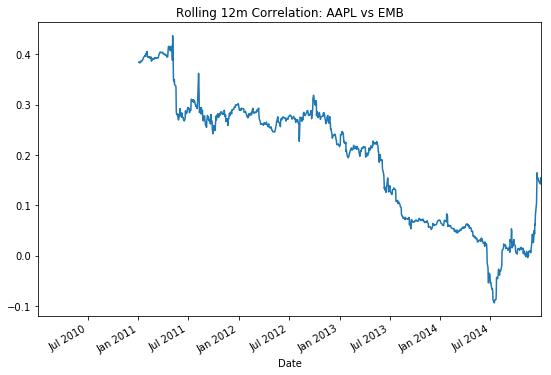

In [17]:
#Rolling Correlation of AAPL & EMB 
pd.rolling_corr(n4_log['AAPL'],n4_log['EMB'],
                window=252).plot(figsize=(9,6),
                                 title='Rolling 12m Correlation: AAPL vs EMB')

## EqualWeight Portfolio

* 10 assets
* 10% weights
* Diversified between US Equities, US Treasuries, Crude Oil, and Gold. 

In [32]:
#Create DF w/USD values of each asset
def equalwgt_portfolio(df):
    start_value = 10000100  #10MM USD
    wghts = 0.1
    share_count = ((start_value * wghts) / df.ix[0])
    portfolio = df * share_count
    portfolio['Portfolio (MM $)'] = portfolio.sum(axis=1)
    return (portfolio/1000)   # Show values as thousands

equalwgt_portfolio(nickolas4).tail()

/Users/nabrarpour4/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB,Portfolio (MM $)
Date,,,,,,,,,,,
2019-12-26,10897.622163,6513.611933,2036.000140,320.092597,1296.734279,3480.366736,4265.410619,2827.366403,NaN,1801.851141,33439.056011
2019-12-27,10893.477434,6525.516814,2038.230314,320.589250,1296.278901,3479.504565,4289.436833,2844.324435,NaN,1806.750052,33494.108598
2019-12-30,10958.285919,6469.276515,2030.796401,320.092597,1299.011168,3460.321272,4262.163833,2840.213397,NaN,1803.747494,33443.908596
2019-12-31,11038.166145,6473.792159,2011.022191,318.105987,1301.470209,3468.727434,4277.315500,2844.324435,NaN,1803.905523,33536.829585
2020-01-02,11290.241010,6593.661995,2033.621288,318.105987,1311.033147,3501.166599,4346.147357,2825.824764,NaN,1806.117935,34025.920080


/Users/nabrarpour4/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


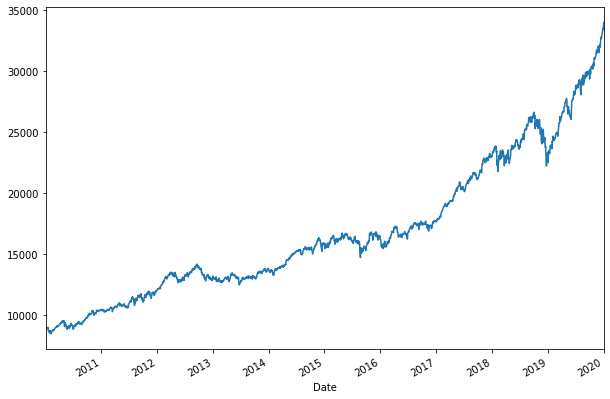

In [33]:
#Portfolio Value in USD
n4_equalwght = equalwgt_portfolio(nickolas4)['Portfolio (MM $)']
n4_equalwght.plot(figsize=(10,7))

### Portfolio Performance

#### Log Returns

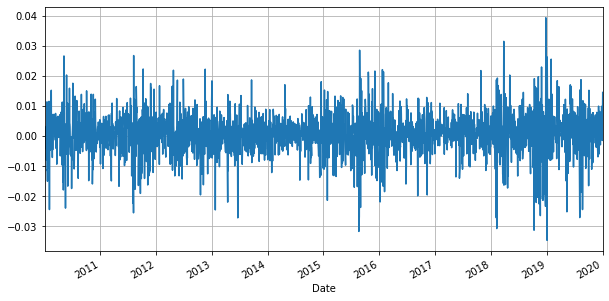

In [40]:
#Log Returns
def log_return(df):
    lr = np.log(df/df.shift(1))
    lr = lr.fillna(value=0)
    return lr

#Define object w/portfolio log returns as a series
n4_equalwght_logrets = log_return(n4_equalwght)

#Plot Log Returns
n4_equalwght_logrets.plot(figsize=(10,5), grid=True)

#### Annualized Returns

In [41]:
#Avg Annualized Return
def returns_average(df):
    ret =  np.log(df/df.shift(1)).mean()*252
    return ret

returns_average(n4_equalwght)

0.13320023015533836

#### Variance

In [42]:
def pf_volatility(df):
    stdev = df.std() * np.sqrt(252)
    var = stdev**2
    return stdev
pf_volatility(n4_equalwght_logrets)

0.10954706083327444

#### Sharpe Ratio

In [43]:
def sharpe_ratio(df):
    ret = returns_average(n4_equalwght)
    rf = risk_free
    risk = pf_volatility(df)
    sharpe = (ret-rf)/risk
    return sharpe

sharpe_ratio(n4_equalwght_logrets)


1.1644347883185986

In [39]:
def portfolio_stats(portf):
    ret = portf.mean() * 252
    stdev = pf_volatility(portf)
    var = (stdev**2)
    rf = risk_free
    sharpe = (ret - rf)/stdev
    
    print("Avg Annualized Return = %3.2f") %ret
    print ("Risk-free rate = %3.4f") %rf
    print("Variance = %3.2f") %var
    print("Standard deviation = %3.2f") %stdev
    print ('Sharpe Ratio = %3.2f') %sharpe
    
    
portfolio_stats(n4_equalwght_logrets)

Avg Annualized Return = %.2f


TypeError: unsupported operand type(s) for %: 'NoneType' and 'float'

## Rolling Stats

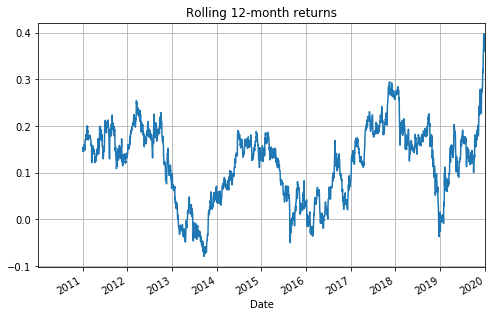

In [50]:
def pf_rolling_return(df):
    x = df.rolling(window=252).mean()*252
    return x


pf_rolling_return(n4_equalwght_logrets).plot(grid=True,figsize=(8,5), 
                                             title='Rolling 12-month returns')



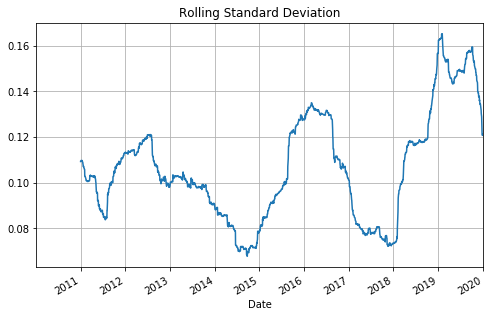

In [52]:
def pf_rolling_stdev(df):
    x = df.rolling(window=252).std() * np.sqrt(252)
    return x

pf_rolling_stdev(n4_equalwght_logrets).plot(grid=True,figsize=(8,5), 
                                             title='Rolling Standard Deviation')

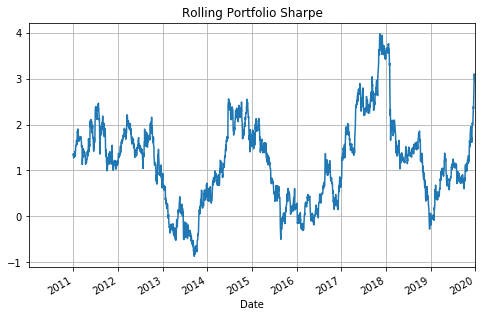

In [54]:
def pf_rolling_sharpe(df):
    df.fillna(value=0)
    rf = risk_free
    x = pf_rolling_stdev(df)
    y = pf_rolling_return(df)
    s = (y-rf)/x
    return s

pf_rolling_sharpe(n4_equalwght_logrets).plot(grid=True,figsize=(8,5), 
                                             title='Rolling Portfolio Sharpe')

# 1.) Modern Portfolio Theory

* Weights must add to 100% 
* No shorting

In [61]:
weights = np.random.random(len(n4_log.columns))  #generate 10 random numbers between 0 and 1
weights /= np.sum(weights)       #normalize values so that sum = 1 

In [62]:
# 100% Allocation
print(sum(weights))
print(weights)

1.0
[0.13687897 0.10522512 0.01036281 0.14317577 0.07875357 0.07291475
 0.11003964 0.1473932  0.07822661 0.11702958]


#### Expected Portfolio Return

In [63]:
# Expected Portfolio Return
def pf_return(df):
    mu = np.sum(df.mean() * weights) * 252
    return mu
pf_return(n4_log)

0.09905816430637975

#### Expected Portfolio Risk

In [64]:
def pf_var(df):
    sigma_sqrd = np.dot(weights.T, np.dot(df.cov() * 252, weights))
    return sigma_sqrd
pf_var(n4_log)

0.01450820947006543

In [67]:
def pf_stdev(df):
    sigma = np.sqrt(np.dot(weights.T, np.dot(df.cov() * 252, weights)))
    return sigma
pf_stdev(n4_log)

0.12045002893343543

#### Sharpe Ratio

In [68]:
def pf_sharpe(df):
    mu = pf_return(df)
    sigma = pf_stdev(df)
    rf = risk_free
    SR = (mu-rf)/sigma
    return SR
pf_sharpe(n4_log)

0.7755775865773012

In [69]:
def pf_stats(df):    
    x = pf_stdev(df)    
    y = pf_return(df)
    rf = risk_free
    var = pf_var(df)
    sharpe = (y-rf)/x
    
    print("Expected Portfolio Stats\n") + 40 * "-" + "\n"
    print("Annual Return = %3.2f") %y
    print ("Risk-free rate = %3.4f") %rf
    print("Variance = %3.4f") %var
    print("Standard deviation = %3.4f") %x
    print ('Sharpe Ratio = %3.2f') %sharpe
    
pf_stats(n4_log)

Expected Portfolio Stats



TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

# 2.) Monte Carlo Simulation 

* Generate vectors of random portfolio weights on a larger scale. 


* For every simulated allocation, we record the resulting portflio return and variance. 


* Of paramount interest to investors is the risk-return profiles that are possible for a given set of securities and their statistical characteristics.

In [82]:
#Iterations
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(asset_count)
    weights /= np.sum(weights)
    prets.append(np.sum(n4_log.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(n4_log.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

* Illustrate the resulting values from the Monte Carlo Simulation

* Show the sharpe ratio (assume Risk-Free = 0)

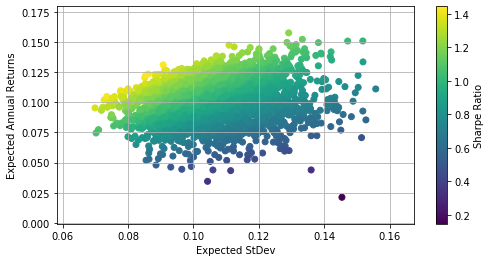

In [83]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c = prets/pvols, marker = 'o')
plt.grid(True)
plt.xlabel("Expected StDev")
plt.ylabel('Expected Annual Returns')
plt.colorbar(label = 'Sharpe Ratio')

* It is clear by inspection from the above graph that not all weight distributions perform well when measured in terms of mean and variance. 

* For example, for a fixed level of risk, say 20%, there are multiple portfolios with distinct returns. As as investor one is generally interested in the maximum retrun given a fixed level of risk or the minimum risk given a return expectation.... (Known as the efficient frontier)

# 3.) Portfolio Optimization

#### Method 1 - Maximize Sharpe Ratio 

* Minimize negative values

In [70]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(n4_log.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(n4_log.cov() * 252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [71]:
def maximize_sharpe(weights):
    return -statistics(weights)[2]

* Constraint is that all parameters add up to 1, and can be formulated using the conventions of the minimize function

In [72]:
cons = ({'type':'eq', 'fun': lambda x: np.sum(x) - 1})

* Bound parameter values to be within 0.05 and 1. 


* These values are provided to the minimization function as a tuple of tuples in this case:

In [73]:
bnds = tuple((0.05, 1) for x in range(asset_count))

*  A starting parameter list (weight values) is needed to call the optimization function


* Equal Distribution of Weights of 10% (initial guesses for the weights). 

In [74]:
asset_count * [1. / asset_count,]

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

* Store optimization results in an object

In [75]:
pf_optimize_sharpe = sco.minimize(maximize_sharpe, asset_count * [1. / asset_count,], method='SLSQP',
                       bounds=bnds, constraints=cons)

* Call the function

In [76]:
pf_optimize_sharpe

     fun: -1.455177683384235
     jac: array([-0.27580948, -0.20264927, -0.27594058,  4.10538343,  0.33295722,
       -0.02557348, -0.27584143, -0.1608777 , -0.27577792, -0.18687649])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.08965885, 0.05      , 0.36082345, 0.05      , 0.05      ,
       0.05      , 0.18989956, 0.05      , 0.05961815, 0.05      ])

* Retrieve the optimal portfolio composition by accessing the results object by providing the key of interest (x, in our case). 


* Optimal Portfolio has only 5 assets out of 10 total

In [77]:
pf_optimize_sharpe['x'].round(3)

array([0.09 , 0.05 , 0.361, 0.05 , 0.05 , 0.05 , 0.19 , 0.05 , 0.06 ,
       0.05 ])

In [78]:
#Portfolio weights sum to 1
np.sum(pf_optimize_sharpe['x'].round(3))

1.001

In [79]:
#Using the portfolio weights from the optimization, the following statistics emerge:
statistics(pf_optimize_sharpe['x']).round(3)

array([0.104, 0.071, 1.455])

* Optimal Portfolio Weights

In [80]:
expd_return = statistics(pf_optimize_sharpe['x']).round(3)[0] - risk_free
expd_risk = statistics(pf_optimize_sharpe['x']).round(3)[1]
sharpe = statistics(pf_optimize_sharpe['x']).round(3)[2]

In [48]:
def portfolio_results():
    print "Portfolio Results (%)"
    print 30 * "-"
    print "Expected Return = %4.3f" % expd_return
    print "Risk free rate = %4.3f" %risk_free
    print "Standard Deviation = %4.3f" % expd_risk
    print "Sharpe Ratio = %4.3f" % sharpe
portfolio_results()

Portfolio Results (%)
------------------------------
Expected Return = 0.109
Risk free rate = 0.001
Standard Deviation = 0.075
Sharpe Ratio = 1.470


#### Method 2 -  Minimize Portfolo Variance

In [89]:
def minimize_variance(weights):
    return statistics(weights)[1] ** 2

In [90]:
pf_minimize_variance = sco.minimize(minimize_variance, asset_count * [1. / asset_count,], method='SLSQP',
                                   bounds = bnds, constraints=cons)

In [91]:
#Absolute Minimum Variance Portfolio (on the efficient frontier curve)
pf_minimize_variance  

     fun: 0.057261041716962
     jac: array([ 0.1233425 ,  0.0515606 , -0.01725159,  0.03737241,  0.00126882,
        0.04307027,  0.02281833,  0.01943176,  0.06191687,  0.00785355])
 message: 'Positive directional derivative for linesearch'
    nfev: 46
     nit: 7
    njev: 3
  status: 8
 success: False
       x: array([0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

* Minimum variance portfolio only contains 5 assets ot of the possible 10.

In [92]:
pf_minimize_variance['x'].round(3)

array([0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [93]:
ER = statistics(pf_minimize_variance['x']).round(3)[0] - risk_free
STDEV = statistics(pf_minimize_variance['x']).round(3)[1]
SHARPE = statistics(pf_minimize_variance['x']).round(3)[2]

In [119]:
def portfolio_results():
    print("Portfolio Results (%)")
    print(30 * "-")
    print("Expected Return = %4.3f") % ER
    print("Standard Deviation = %4.3f") % STDEV
    print("Sharpe Ratio = %4.3f") % SHARPE
portfolio_results()

Portfolio Results (%)
------------------------------
Expected Return = %4.3f


TypeError: unsupported operand type(s) for %: 'NoneType' and 'float'

# 4.) Efficient Frontier

* The derivation of all optimal portfolios - i,e, all portfolios with minimum volatility for a given target return level (or all portfolios with maximum return for a given level of risk level) - is similar to the previous optimization


* The only difference is that we have to iterate over multiple starting conditions. The approach we take is that we fix a target return level and derive for each such level those portfolio weights that lead to the minimum volatility value. 


* For the optimization, this leads to two conditions: 
        1.) target return level (trets) 
        2.) sum of portfolio weights. 


* The boundary values for each parameter remain the same

In [95]:
#Optimization Constraints
cons = ({'type':'eq', 'fun':lambda x: statistics(x)[0] - tret}, 
      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

#Boundary values
bnds = tuple((0.01,1) for x in weights)

* For clarity, define a dedicated function for use in the minimization process (min_func_port)
* It merely returns the volatility values from the statistics function

In [96]:
#Minimization of Portfolio vol
def min_func_port(weights):
    return statistics(weights)[1]

#Maximize Sharpe Volatility
def maximize_sharpe(weights):
    return -statistics(weights)[2]

#Minimize Variance
def minimize_variance(weights):
    return statistics(weights)[1] ** 2

* When iterating over different target levels (trets), one condition for the minimization changes


* That is why the conditions dictionary is updated during every loop

In [97]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, asset_count * [1. / asset_count,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 37.9 s, sys: 25.4 ms, total: 38 s
Wall time: 38 s


* Crosses indicated the optimal portfolios given a certain target return


* The dots are portfolios


* Figure shows two larger stars: 
        
    1.) minimum volatility portfolio (the leftmost portfolio) 

    2.) maximum Sharpe Ratio (top-middle portfolio)
        

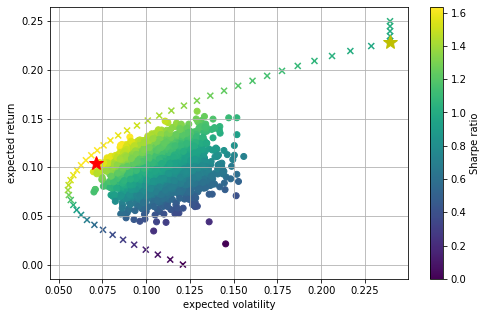

In [98]:
#Optimization Results

plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(pf_optimize_sharpe['x'])[1], statistics(pf_optimize_sharpe['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(pf_minimize_variance['x'])[1], statistics(pf_minimize_variance['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

* The efficient frontier is compromised of all optimal portfolios with a higher return than the absolute minimum variance portflios. These portfolios dominae all other portfolos in terms of expected returns given a certain level of risk. 


# 5.) Capital Market Line
* A tangent line of the efficient frontier taht goes through the risk-return point of the riskless portfolio. 

* For example, consider a riskless rate of rf = 0.01. We look for that portfolio on the efficient frontier for which the tangent goes through the point (stdev*rf)=(0, 0.01) in risk-return space.

* For the calculation to follow, we need a functional approximation and the first derivative for the efficient frontier. We use cubic splines interpolation to this end. 

In [99]:
import scipy.interpolate as sci

In [100]:
#For spline interpolation, only use the portfolios from the efficient frontier. 
#The following code selects these portfolios from our previously used sets tvols & trets

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

- the new ndarray objects 'evols' and 'erets' are used for the interpolation

In [101]:
tck = sci.splrep(evols, erets)

ValueError: Error on input data

* Via this numerical route we end up being able to define a continuously differentiable function f(x) for the efficient frontier and the respective first derivative function df(x):

In [62]:
def f(x):
    "Efficient Frontier function (splines approximation)"
    return sci.splev(x, tck, der=0)
def df(x):
    "First derivative of efficient frontier function"
    return sci.splev(x, tck, der=1)


* What we are looking for is a function t(x)=a+b*x describing the line that passes throught the riskless asset in risk-return space and that is tangent to the efficient frontier. 

* The function has to satisfy all of the below conditions:
        t(x) = a+b*x
        t(0) = rf    <----------> a = rf
        t(x) = f(x)  <----------> a+b*x = f(x)
        t(x) = f(x)  <----------> b = f(x)

* We have to solve the system of equations since we do not have a closed formula for the efficient front or the first derivative. To this end, we define a Python function that returns the values of all three equations given the parameter set p = (a,b,x) 


In [63]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

* The function fsolve from scipy.optimize is capable of solving such a system of equations. 


* We provide an initial parametrization in addtion to the function equations. 


* Note that success or failure of the optimiation might depend on the initial parametrization, which therefore ahs to be chosen carefully - generally by a combination of educated guesses with trial and error: 

In [64]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

* The numerical optimization yields the following values. As desired, we have a = rf = 0.01

In [65]:
opt

array([ 0.01      ,  1.61933714,  0.07183509])

* The three equations, as desired, are also zero: 

In [66]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

* The scatterplot represents the results graphically


* The star represents the optimal portfolio from th efficient frontier where the tangent line passes through the riskless asset point (0,rf = 0.01). 


* The optimal portfilio has an expected volatility of 20.5% and an expected return of 17.6%. 

In [ ]:
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
plt.figure(figsize=(9, 6))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
#Constraints
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

res = sco.minimize(min_func_port, asset_count * [1. / asset_count,], method='SLSQP',
                       bounds=bnds, constraints=cons)

#### Asset Weights 

In [69]:
res['x'].round(2)

array([ 0.12,  0.01,  0.43,  0.01,  0.01,  0.23,  0.07,  0.07,  0.01,  0.04])

#### Sum of Portfolio Weights

In [70]:
sum(res['x']).round(1)

1.0

#### END OF PORTFOLIO MANAGEMENT

In [71]:
4**4

256

In [ ]:
NICKOLAS4

In [72]:
#Spline Interpolation
tck

(array([ 0.0578353 ,  0.0578353 ,  0.0578353 ,  0.0578353 ,  0.05909576,
         0.06039947,  0.06212678,  0.06424963,  0.06672804,  0.06952363,
         0.07260063,  0.07603106,  0.08011002,  0.08476909,  0.08991994,
         0.09548117,  0.10142388,  0.1077156 ,  0.11429777,  0.12112304,
         0.12815258,  0.13535457,  0.1427029 ,  0.15018326,  0.15793379,
         0.1659789 ,  0.1742778 ,  0.18279594,  0.19150406,  0.20037738,
         0.20939492,  0.21853881,  0.22779385,  0.24658715,  0.24658715,
         0.24658715,  0.24658715]),
 array([ 0.08673469,  0.09326047,  0.09710539,  0.10283558,  0.10761104,
         0.11264451,  0.11764543,  0.12268881,  0.12781865,  0.13312688,
         0.13807427,  0.14311345,  0.14814945,  0.15323068,  0.1583087 ,
         0.16337917,  0.16845939,  0.17354427,  0.17863269,  0.18372577,
         0.18881549,  0.19397318,  0.19907514,  0.20416027,  0.20925   ,
         0.21434178,  0.21943557,  0.22453082,  0.22962725,  0.23472464,
         0.2415